# Data Analysis for the Original Cohort (the "Population")

## Counts
- Total students : 6000
- Tutorial Groups : 120 (50 students each)

## Gender :
- Male : 2759
- Female : 3241

## Schools :
ADM : 166
ASE : 104
CCDS : 702
CCEB : 465
CEE : 321
CoB (NBS) : 793
CoE : 275
EEE : 788
HASS : 1
LKCMedicine : 83
MAE : 512
MSE : 156
NIE : 199
SBS : 302
SPMS : 276
SSS : 425
SoH : 332
WKW SCI : 150

## GPA
- $\mu = 4.09$
- $\sigma^{2} = 0.01$
- Slightly positively-skewed normal distribution

There are 2759 males and 3241 females in the cohort
These are the list of schools: 
 ['ADM', 'ASE', 'CCDS', 'CCEB', 'CEE', 'CoB (NBS)', 'CoE', 'EEE', 'HASS', 'LKCMedicine', 'MAE', 'MSE', 'NIE', 'SBS', 'SPMS', 'SSS', 'SoH', 'WKW SCI']


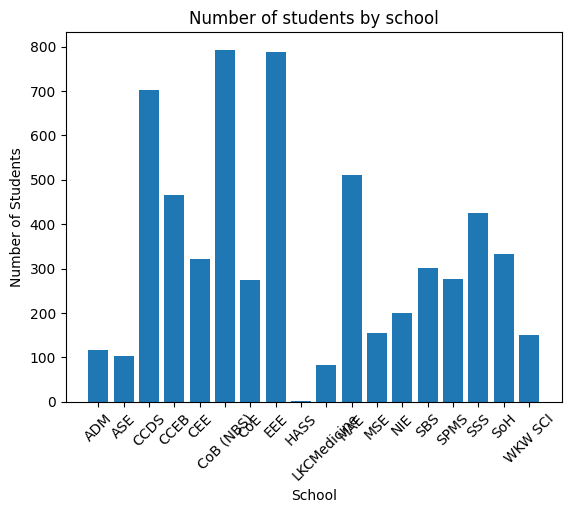

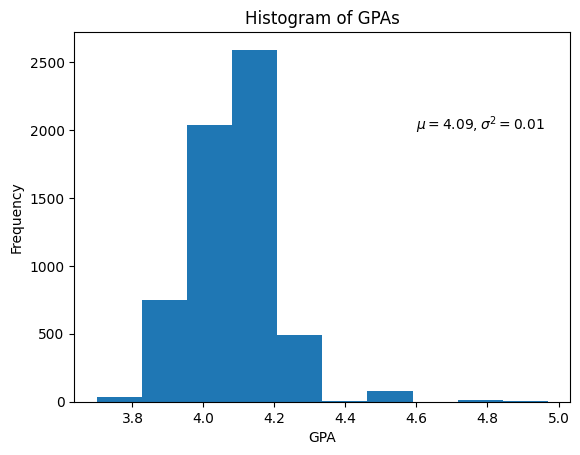

In [ ]:
#%%

## Data analysis for the original records.csv

import matplotlib.pyplot
import statistics

# read the csv file
# open and copy records
fp = open("records.csv",'r')
pool = [i.replace('\n','').split(',') for i in fp.readlines()][1:]
fp.close()

GPAlst = [float(student[5]) for student in pool]
muGPA = statistics.mean(GPAlst)
sigmasqrGPA = statistics.pvariance(GPAlst)

genderlst = [student[4] for student in pool]
numMales = genderlst.count("Male")
numFemales = genderlst.count("Female")
schoollst = [student[2] for student in pool]
uniquelst = sorted(set(schoollst)) #get the list of unique schools

schoolcounts = []
for school in uniquelst:
    thatschoolcount = schoollst.count(school)
    schoolcounts.append(thatschoolcount)

# Output the results
print(f"There are {numMales} males and {numFemales} females in the cohort")


print(f"These are the list of schools: \n {uniquelst}")
matplotlib.pyplot.figure(1)
matplotlib.pyplot.bar(uniquelst,schoolcounts)
matplotlib.pyplot.title("Number of students by school")
matplotlib.pyplot.ylabel("Number of Students")
matplotlib.pyplot.xlabel("School")
matplotlib.pyplot.xticks(rotation=45)
matplotlib.pyplot.show()

matplotlib.pyplot.figure(2)
matplotlib.pyplot.hist(GPAlst)
matplotlib.pyplot.title("Histogram of GPAs")
matplotlib.pyplot.ylabel("Frequency")
matplotlib.pyplot.xlabel("GPA")
matplotlib.pyplot.text(4.6, 2000, f"$\\mu = {muGPA:.2f}, \\sigma^2 = {sigmasqrGPA:.2f}$")
matplotlib.pyplot.show()

___
# Algorithm Explanation
## Greedy Sorting Algorithm
**Idea :** Make optimal choices **at each step** instead of finding a global optimum solution.

**Functioning :**

For selecting each member of the team,
1. Analyse current team statistics
2. Determine ideal criteria based on the statistics
3. Choose student best matching that criteria
4. Repeat until the team is formed
___
## Criteria for Team Formation
### Gender
If there are more than 3 members of the same gender, choose student of opposite gender.

### School
**Blacklist System :**
If there are more than 1 members from the same school, add school to blacklist. Choose student not in school blacklist.

### CGPA
**Two Pointer Technique :**
Sort the tutorial group by CGPA. On odd passes, take the lowest CGPA student and on even passes, the highest.

This ensures that high CGPA students get paired with low CGPA ones, and the ones in the middle are paired with each other.

This system is fair for all students, which makes up for it's unpredictable mean CGPA values.
___

# Flowchart
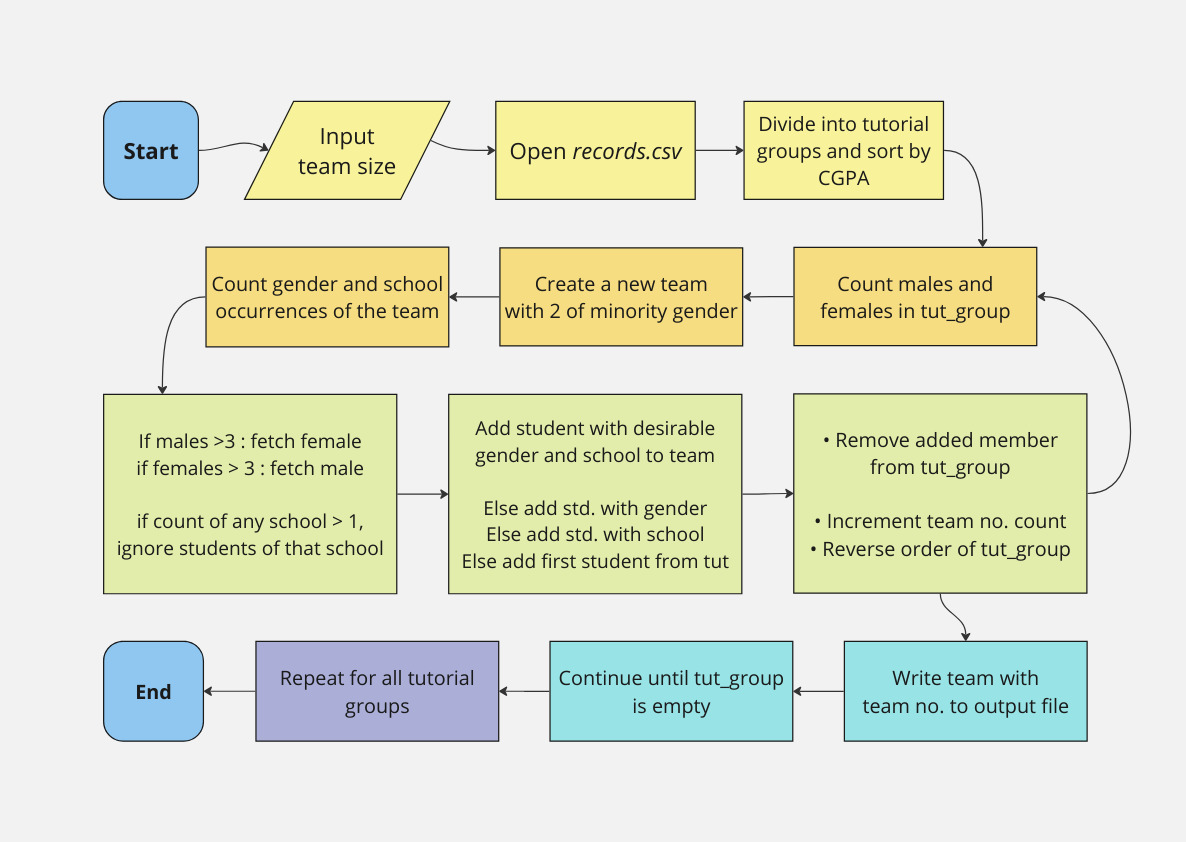
___

In [ ]:
toggle_cgpa = 0
school = ['CCDS', 'EEE', 'CoB (NBS)', 'SoH', 'WKW SCI',
          'CoE', 'MAE', 'SPMS', 'SBS', 'SSS', 'ASE','NIE',
          'ADM', 'CCEB', 'MSE', 'LKCMedicine', 'CEE', 'HASS']

# config
team_size = int(input())

# open and copy records
with open('records.csv','r') as records:
    header = records.readline() # store first line of records.csv
    cohort = [i[:-1].split(',') for i in records.readlines()] # convert records to list
    tuts = [sorted(cohort[i:i+50], key = lambda x: x[5]) for i in range(0,len(cohort),50)] # 2D list of all students sorted by cgpa

output = open('output.csv','w')
output.write(header[:-1]+',Team Assigned\n') # write output.csv file table headers


# fetch desirable student from the tutorial group
def fetch_std(tut,gender='',schools=[]):
    global toggle_cgpa
    toggle_cgpa ^= 1 # switch between 0 and 1
    if toggle_cgpa: tut = tut[::-1] # reverse tut group every other run

    gender_match, school_match = [], []
    for std in tut:
        if std[4] in gender and std[2] not in schools: return std # return perfect match if found
        if std[4] in gender: gender_match.append(std)
        if std[2] not in schools: school_match.append(std)
    if gender_match: return gender_match[0] # else return gender match
    elif school_match: return school_match[0] # else return non-blacklisted school
    else: return tut[0] # else return first student from tut


# for each tutorial group
for tut_grp in tuts:
    team_no = 0
    while tut_grp:
        if len(tut_grp)<team_size: break # move on if students left over

        # tutorial group statistics
        m_tut = f_tut = 0
        for student in tut_grp:
            if student[4]=='Male': m_tut += 1
            else: f_tut += 1

        # team variables
        males = females = 0
        schools = {i:0 for i in school}
        team = []
        team_no += 1

        # append minority gender to team
        for _ in range(team_size//2):
            if m_tut>f_tut: member = fetch_std(tut_grp,gender='Female')
            else: member = fetch_std(tut_grp,gender='Male')
            team.append(member)
            tut_grp.remove(member)

        # fetch and append to team
        while len(team)<team_size:
            for std in team:
                schools[std[2]] += 1 # school
                if std[4]=='Male': males += 1 # gender
                else: females += 1
            school_bl = [i for i in schools if schools[i]>team_size//2-1] # blacklist schools with 2+ members

            if males>3: team.append(fetch_std(tut_grp,gender='Female',schools=school_bl))
            elif females>3: team.append(fetch_std(tut_grp,gender='Male',schools=school_bl))
            else: team.append(fetch_std(tut_grp,schools=school_bl))

            # remove selected team members from the pool
            for member in team:
                if member in tut_grp: tut_grp.remove(member)

        # write to file output.csv
        for member in team:
            member.append(str(team_no)) # attach team number to each student
            output.write(','.join(member)+'\n')

output.close()

5


# Analysis of results: How did the algorithm do?

In the ideal scenario, each group should:
* Have no more than 3 males or 3 females
* Have 5 different schools (i.e. each student in the group is from a different school)
* Have a mean GPA equal to the mean GPA of the cohort

## Hence, we plotted the following graphs to analyse the results:
* Bar chart of the number of groups with 0, 1, 2, 3, 4, 5 males
  * The ideal groups would have 2 or 3 males

* Bar chart of the number of groups with 1, 2, 3, 4, 5 unique schools
  * The ideal groups would have 5 unique schools

* Scatter plot and histogram of the mean GPA in each school
  * The ideal outcome is the groups have a mean GPA of each group $\bar{X}$ to be approximately normally distributed about the cohort (population) average GPA $\mu_{team}$, with a variance $\sigma_{team}^2$ in mean GPAs as small as possible. Mathematically,

$$\bar{X} \sim \mathcal{N}(\mu_{team}, \sigma_{team}^2)$$

* As a bonus for greater insight (though the algorithm was not specially designed to account for this), we also plotted the sample variance, $S^{2}$ of GPAs in each group. The expected value of $S^{2}$ should be the population variance, $\sigma^2$. Mathematically,


$$E(S^2) = \sigma^2$$

## How we plotted the figures
We read output.csv, then used the in-built python package matplotlib to plot the graphs. Statistical functions were provided by the statistics package.

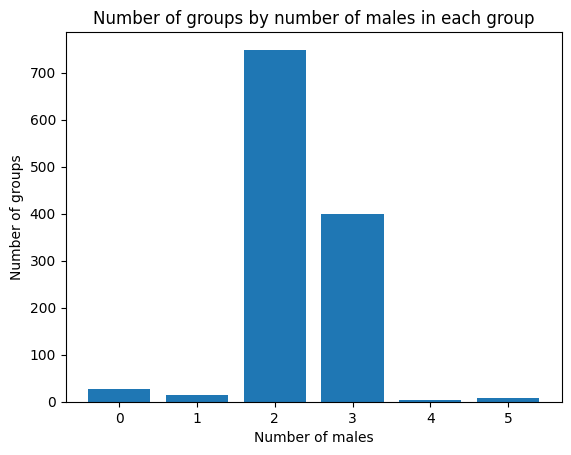

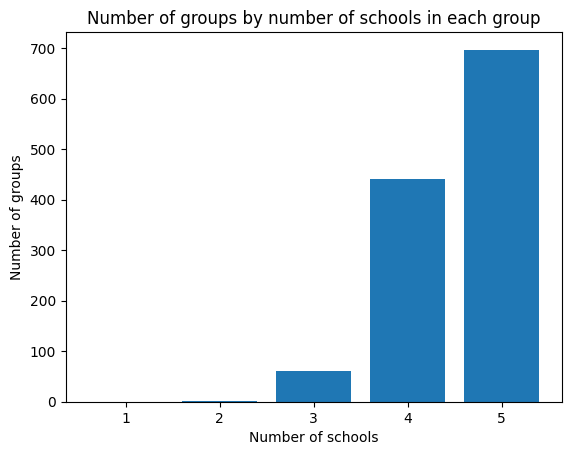

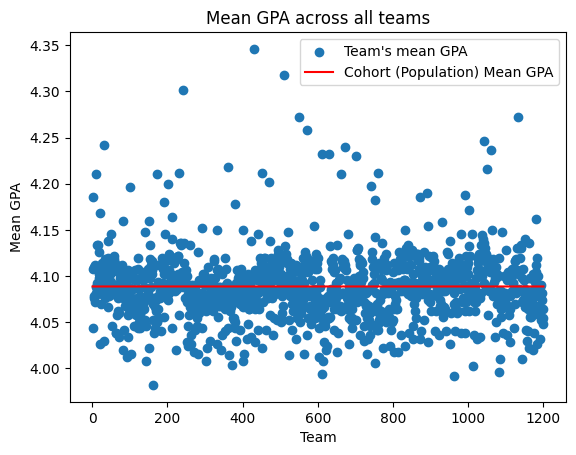

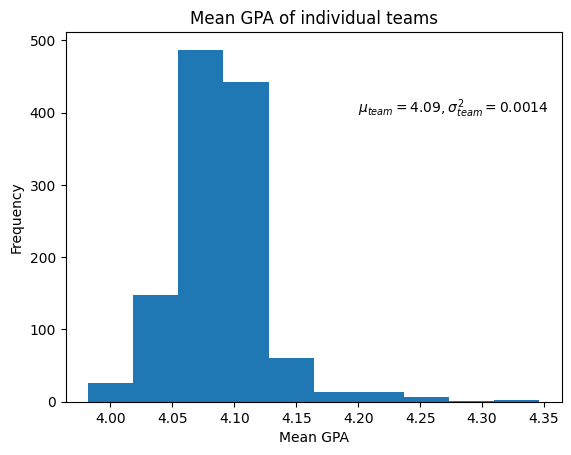

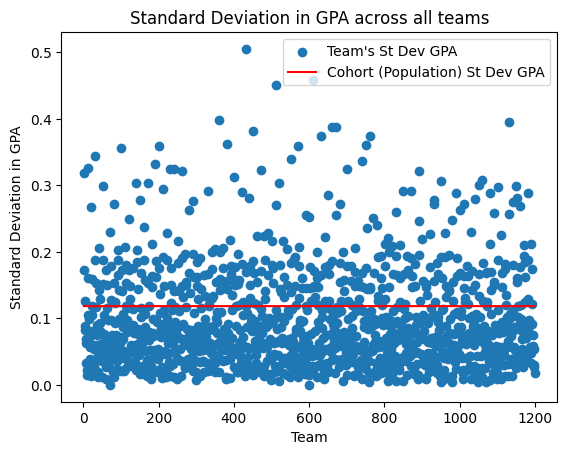

In [ ]:
# %%

import statistics
import matplotlib
import matplotlib.pyplot

with open("output.csv", "r") as inFile:
    sortedgroups=inFile.readlines()

pool = [i.replace('\n','').split(",") for i in sortedgroups if i != '\n']
pool.pop(0) #remove the headerline

gpa_cohort = [float(k[5]) for k in pool]
meangpa_cohort = statistics.mean(gpa_cohort)
stdevgpa_cohort = statistics.pstdev(gpa_cohort)

male_allteams = []
gpa_stdev_allteams = []
gpa_mean_allteams = []
schoolcount_allteams = []


for j in range(0,len(pool),5):
    malecount = 0
    femalecount = 0
    team = pool[j:j+5]
    for student in team:
        if student[4] == 'Male':
            malecount +=1
        else:
            femalecount += 1

    gpalist = [float(student[5]) for student in team]
    stdevteam = statistics.stdev(gpalist) #this is to calculate sample standard deviation, s
    meangpa=statistics.mean(gpalist)

    schoollist = [student[2] for student in team]
    uniqueschools = list(set(schoollist))
    numberSchools = len(uniqueschools)

    gpa_stdev_allteams.append(stdevteam)
    gpa_mean_allteams.append(meangpa)
    schoolcount_allteams.append(numberSchools)
    male_allteams.append(malecount)

muteammean = statistics.mean(gpa_mean_allteams)
sigmasqr_teammean = statistics.pvariance(gpa_mean_allteams)

#configure for bar chart plotting
countlabels = [0,1,2,3,4,5]

#by gender
male_numberofgroups = [male_allteams.count(0),male_allteams.count(1),male_allteams.count(2),male_allteams.count(3),male_allteams.count(4),male_allteams.count(5)]

#print(male_numberofgroups)

matplotlib.pyplot.figure(1)
matplotlib.pyplot.bar(countlabels,male_numberofgroups)
matplotlib.pyplot.title("Number of groups by number of males in each group")
matplotlib.pyplot.ylabel("Number of groups")
matplotlib.pyplot.xlabel("Number of males")
matplotlib.pyplot.show()

#by school
schoolcountlabels=[1,2,3,4,5]
school_numberofgroups = [schoolcount_allteams.count(1),schoolcount_allteams.count(2),schoolcount_allteams.count(3),schoolcount_allteams.count(4),schoolcount_allteams.count(5)]
matplotlib.pyplot.figure(2)
matplotlib.pyplot.bar(schoolcountlabels,school_numberofgroups)
matplotlib.pyplot.title("Number of groups by number of schools in each group")
matplotlib.pyplot.ylabel("Number of groups")
matplotlib.pyplot.xlabel("Number of schools")
matplotlib.pyplot.show()

#GPA stuff
teamlabels = list(range(1,len(gpa_mean_allteams)+1))

#mean GPA scatter
matplotlib.pyplot.figure(3)
matplotlib.pyplot.scatter(teamlabels,gpa_mean_allteams)
matplotlib.pyplot.plot(teamlabels,[meangpa_cohort]*len(teamlabels),"r")
matplotlib.pyplot.legend(["Team's mean GPA", "Cohort (Population) Mean GPA"])
matplotlib.pyplot.title("Mean GPA across all teams")
matplotlib.pyplot.ylabel("Mean GPA")
matplotlib.pyplot.xlabel("Team")
matplotlib.pyplot.show()

#mean GPA histogram
matplotlib.pyplot.figure(4)
matplotlib.pyplot.hist(gpa_mean_allteams)
matplotlib.pyplot.title("Mean GPA of individual teams")
matplotlib.pyplot.ylabel("Frequency")
matplotlib.pyplot.xlabel("Mean GPA")
matplotlib.pyplot.text(4.2, 400, f"$\\mu_{{team}} = {muteammean:.2f}, \\sigma^2_{{team}} = {sigmasqr_teammean:.4f}$")
matplotlib.pyplot.show()

#st dev GPA
matplotlib.pyplot.figure(5)
matplotlib.pyplot.scatter(teamlabels,gpa_stdev_allteams)
matplotlib.pyplot.plot(teamlabels,[stdevgpa_cohort]*len(teamlabels),"r")
matplotlib.pyplot.legend(["Team's St Dev GPA", "Cohort (Population) St Dev GPA"])
matplotlib.pyplot.title("Standard Deviation in GPA across all teams")
matplotlib.pyplot.ylabel("Standard Deviation in GPA")
matplotlib.pyplot.xlabel("Team")
matplotlib.pyplot.show()
# %%


# Interpretation - How Our Algorithm Did


*   Algorithm sorted very well for gender diversity - minimal number of groups with 0-1, or 4-5 males
*   Algorithm sorted fairly well for school diversity - the majority (around 700) of the groups had five unique schools, the vast majority (around 1150) of groups had at most 1 repeated school
* Algorithm also did relatively well for team mean GPA: the distribution of team average GPA is very close to the distribution of the GPA across the population (with a bit of a positive skew). The variance in team mean GPAs is also very small (smaller than the variance in GPAs across the cohorts)

Bonus insights:
* The variance / standard deviation in GPAs within each group is also smaller-than-expected, meaning that the students in each group's GPA is all clustered around the same value. However, there are a few groups with a very wide variance of GPAs

